## Boundaries of the Mandelbrot set with Jungreis version

0 2400
100 2400
200 2400
300 2400
400 2400
500 2400
600 2400
700 2400
800 2400
900 2400
1000 2400
1100 2400
1200 2400
1300 2400
1400 2400
1500 2400
1600 2400
1700 2400
1800 2400
1900 2400
2000 2400
2100 2400
2200 2400
2300 2400


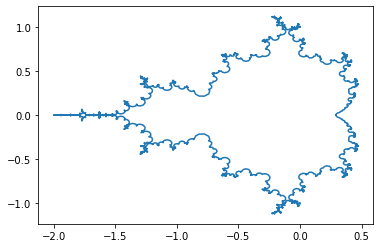

In [2]:
import numpy as np
import matplotlib.pyplot as plt

nstore = 3000  #cachesize should be more or less as high as the coefficients
betaF_cachedata = np.zeros( (nstore,nstore))
betaF_cachemask = np.zeros( (nstore,nstore),dtype=bool)
def betaF(n,m):
    """
    This function was translated to python from
    http://fraktal.republika.pl/mset_jungreis.html
    It computes the Laurent series coefficients of the jungreis function
    that can then be used to map the unit circle to the Mandelbrot
    set boundary. The mapping of the unit circle can also
    be seen as a Fourier transform. 
    I added a very simple global caching array to speed it up
    """
    global betaF_cachedata,betaF_cachemask

    nnn=2**(n+1)-1
    if betaF_cachemask[n,m]:
        return betaF_cachedata[n,m]
    elif m==0:
        return 1.0
    elif ((n>0) and (m < nnn)):
        return 0.0
    else: 
        value = 0.
        for k in range(nnn,m-nnn+1):
            value += betaF(n,k)*betaF(n,m-k)
        value = (betaF(n+1,m) - value - betaF(0,m-nnn))/2.0 
        betaF_cachedata[n,m] = value
        betaF_cachemask[n,m] = True
        return value

def main():
    #compute coefficients (reduce ncoeffs to make it faster)
    ncoeffs= 2400
    coeffs = np.zeros( (ncoeffs) )
    for m in range(ncoeffs):
        if m%100==0: 
            print(m,ncoeffs)
        coeffs[m] = betaF(0,m+1)

    #map the unit circle  (cos(nt),sin(nt)) to the boundary
    npoints = 10000
    points = np.linspace(0,2*np.pi,npoints)
    xs     = np.zeros(npoints)
    ys     = np.zeros(npoints)
    xs = np.cos(points)
    ys = -np.sin(points)
    for ic,coeff in enumerate(coeffs):
        xs += coeff*np.cos(ic*points)
        ys += coeff*np.sin(ic*points)
    
    #plot the function
    plt.figure()
    plt.plot(xs,ys)
    plt.show()
    
if __name__ == "__main__":
    main()

## Hyperbolic boundaries of the Mandelbrot set with Distance estimation method

The escape radius is a parameter used in iterating a point under the Mandelbrot Set and Julia Set functions. It is the radius of a circle on the Complex Plane used as a boundary to determine when iteration can stop. The circle is centered at the origin, and has a radius of at least 2.0. As soon as the iteration yields a value that falls outside the circle, iteration can stop and it has been determined that the point that was iterated is not a member of the Mandelbrot Set.

"you need to change "If mag > 2" to increase the escape radius. Attached is a comparison, showing that the "straps" reduce when the radius is increased, no harm going huge like R = 1e6 or so because once it escapes 2 it grows very fast. The bigger the radius, the more accurate the distance estimate.

For more information, see - https://en.wikibooks.org/wiki/Fractals/Iterations_in_the_complex_plane/demm

In [116]:
import numpy as np
import matplotlib.pyplot as plt


def linear_map(a, b, x, image_dim):
    return int(np.interp(x, [a,b], [0, image_dim-1]))
    

#store set of numbers and plot the set boundary
mandel_list = []
image_dim = 256
plot_Mat = 255 * np.ones((image_dim, image_dim))


#all possible points in the mandelbrot set(reduce ncoeffs to make it faster)
cr_min = -2
cr_max = 0.75

ci_min = -1.5
ci_max = 1.5


cr = np.linspace(cr_min, cr_max, image_dim)
ci = np.linspace(ci_min, ci_max, image_dim)
c_list = np.zeros((image_dim, image_dim), dtype = complex)
for i in range(image_dim):
    for j in range(image_dim):
        c_list[i,j] = cr[i] + 1j*ci[j]
        
escape_radius = 1e6
maxiter = 500
mindist = 1e-6


#iterate over c's
[nrow, ncol] = np.shape(c_list)

for i in range(nrow):
    for j in range(ncol):
        
        c = c_list[i,j]
    
        escape_flag = False
        niter = 1

        #initial points
        z = c
        dz = 1.0 + 0*1j
        
        while not escape_flag and niter < maxiter:

            dz = 2 * z * dz + 1
            z = np.power(z,2) + c
            niter += 1
            escape_flag = True if (np.abs(z) > escape_radius) else False

        distance =  2 * np.abs(z) * (np.log(np.abs(z))/np.abs(dz))
        
        posx = linear_map(cr_min, cr_max, np.real(c), image_dim)
        posy = linear_map(ci_min, ci_max, np.imag(c), image_dim)
        plot_Mat[posx, posy] = np.tanh(distance)*255

        if np.abs(distance) < mindist:
            print(c, 'is on boundary of mandelbrot set')
            mandel_list.append(c)
        


(-1.3098039215686275-0.07647058823529407j) is on boundary of mandelbrot set
(-1.3098039215686275+0.07647058823529407j) is on boundary of mandelbrot set
(-1.2558823529411764-0.02941176470588247j) is on boundary of mandelbrot set
(-1.2558823529411764+0.02941176470588225j) is on boundary of mandelbrot set
(-1.2450980392156863-0.08823529411764719j) is on boundary of mandelbrot set
(-1.2450980392156863+0.08823529411764697j) is on boundary of mandelbrot set
(-1.223529411764706-0.1823529411764706j) is on boundary of mandelbrot set
(-1.223529411764706+0.1823529411764706j) is on boundary of mandelbrot set
(-1.2127450980392158-0.1705882352941177j) is on boundary of mandelbrot set
(-1.2127450980392158+0.1705882352941177j) is on boundary of mandelbrot set
(-1.1911764705882353-0.1823529411764706j) is on boundary of mandelbrot set
(-1.1911764705882353-0.1705882352941177j) is on boundary of mandelbrot set
(-1.1911764705882353+0.1705882352941177j) is on boundary of mandelbrot set
(-1.1911764705882353+

(-0.41470588235294126-0.5823529411764706j) is on boundary of mandelbrot set
(-0.41470588235294126+0.5823529411764707j) is on boundary of mandelbrot set
(-0.38235294117647056-0.6529411764705882j) is on boundary of mandelbrot set
(-0.38235294117647056+0.6529411764705881j) is on boundary of mandelbrot set
(-0.3715686274509804-0.6529411764705882j) is on boundary of mandelbrot set
(-0.3715686274509804-0.6294117647058823j) is on boundary of mandelbrot set
(-0.3715686274509804-0.6058823529411765j) is on boundary of mandelbrot set
(-0.3715686274509804+0.6058823529411765j) is on boundary of mandelbrot set
(-0.3715686274509804+0.6294117647058823j) is on boundary of mandelbrot set
(-0.3715686274509804+0.6529411764705881j) is on boundary of mandelbrot set
(-0.33921568627450993-0.6294117647058823j) is on boundary of mandelbrot set
(-0.33921568627450993+0.6294117647058823j) is on boundary of mandelbrot set
(-0.3176470588235294-0.6529411764705882j) is on boundary of mandelbrot set
(-0.317647058823529

(0.35098039215686283-0.5823529411764706j) is on boundary of mandelbrot set
(0.35098039215686283-0.5235294117647059j) is on boundary of mandelbrot set
(0.35098039215686283-0.4294117647058824j) is on boundary of mandelbrot set
(0.35098039215686283+0.4294117647058824j) is on boundary of mandelbrot set
(0.35098039215686283+0.5235294117647058j) is on boundary of mandelbrot set
(0.35098039215686283+0.5823529411764707j) is on boundary of mandelbrot set
(0.37254901960784315-0.35882352941176476j) is on boundary of mandelbrot set
(0.37254901960784315-0.31176470588235294j) is on boundary of mandelbrot set
(0.37254901960784315-0.28823529411764715j) is on boundary of mandelbrot set
(0.37254901960784315-0.276470588235294j) is on boundary of mandelbrot set
(0.37254901960784315-0.1352941176470588j) is on boundary of mandelbrot set
(0.37254901960784315+0.1352941176470588j) is on boundary of mandelbrot set
(0.37254901960784315+0.276470588235294j) is on boundary of mandelbrot set
(0.37254901960784315+0.2

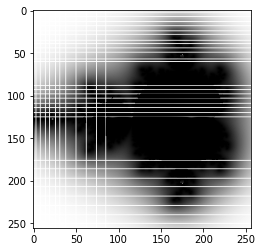

Text(0.5, 1.0, 'Mandelbrot set boundary')

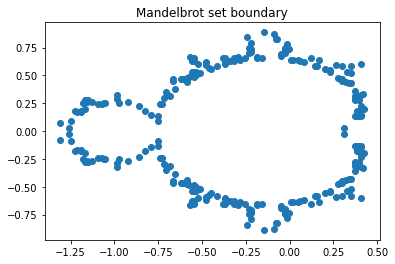

In [117]:
#for plotting

plt.figure()
plt.imshow(plot_Mat.T, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

x_plot = np.real(mandel_list)
y_plot = np.imag(mandel_list)
plt.figure()
plt.scatter(x_plot, y_plot)
plt.title('Mandelbrot set boundary')


In [175]:
# save mandelbrot set points in a file 

with open("mandelbrot_boundary.txt", "w") as f:
    for c in mandel_list:
        f.write(str(np.real(c)) +"\t" + str(np.imag(c)) + "\n")
        
        

## Julia sets corresponding to the points on the Mandelbrot set boundary

In [2]:
# read from saved mandelbrot set 
import re
import numpy as np
import matplotlib.pyplot as plt


with open("mandelbrot_boundary.txt") as f:
    comp_num = f.read().splitlines()
         
mandel_list_copy = []
for elem in comp_num:
    string = re.split(r'\t', elem)
    mandel_list_copy.append(float(string[0]) + 1j*float(string[1]))


#initialize and create inputs

def linear_map(a, b, x, image_dim):
    return (np.interp(x, [a,b], [0, image_dim-1])).astype(int)

image_dim = 1024
zr_min = -1.5
zr_max = 1.5
zi_min = -1
zi_max = 1

zr = np.linspace(zr_min, zr_max, image_dim)
zi = np.linspace(zi_min, zi_max, image_dim)
z_list = np.zeros((image_dim, image_dim), dtype = complex)
for i in range(image_dim):
    for j in range(image_dim):
        z_list[i,j] = zr[i] + 1j*zi[j]
z_all = z_list.flatten()

posx = linear_map(zr_min, zr_max, np.real(z_all), image_dim)
posy = linear_map(zi_min, zi_max, np.imag(z_all), image_dim)
    

Finished computing 1 out of 266 sets.
Finished computing 2 out of 266 sets.
Finished computing 3 out of 266 sets.
Finished computing 4 out of 266 sets.
Finished computing 5 out of 266 sets.
Finished computing 6 out of 266 sets.
Finished computing 7 out of 266 sets.
Finished computing 8 out of 266 sets.
Finished computing 9 out of 266 sets.
Finished computing 10 out of 266 sets.
Finished computing 11 out of 266 sets.
Finished computing 12 out of 266 sets.
Finished computing 13 out of 266 sets.
Finished computing 14 out of 266 sets.
Finished computing 15 out of 266 sets.
Finished computing 16 out of 266 sets.
Finished computing 17 out of 266 sets.
Finished computing 18 out of 266 sets.
Finished computing 19 out of 266 sets.
Finished computing 20 out of 266 sets.
Finished computing 21 out of 266 sets.
Finished computing 22 out of 266 sets.
Finished computing 23 out of 266 sets.
Finished computing 24 out of 266 sets.
Finished computing 25 out of 266 sets.
Finished computing 26 out of 266 s

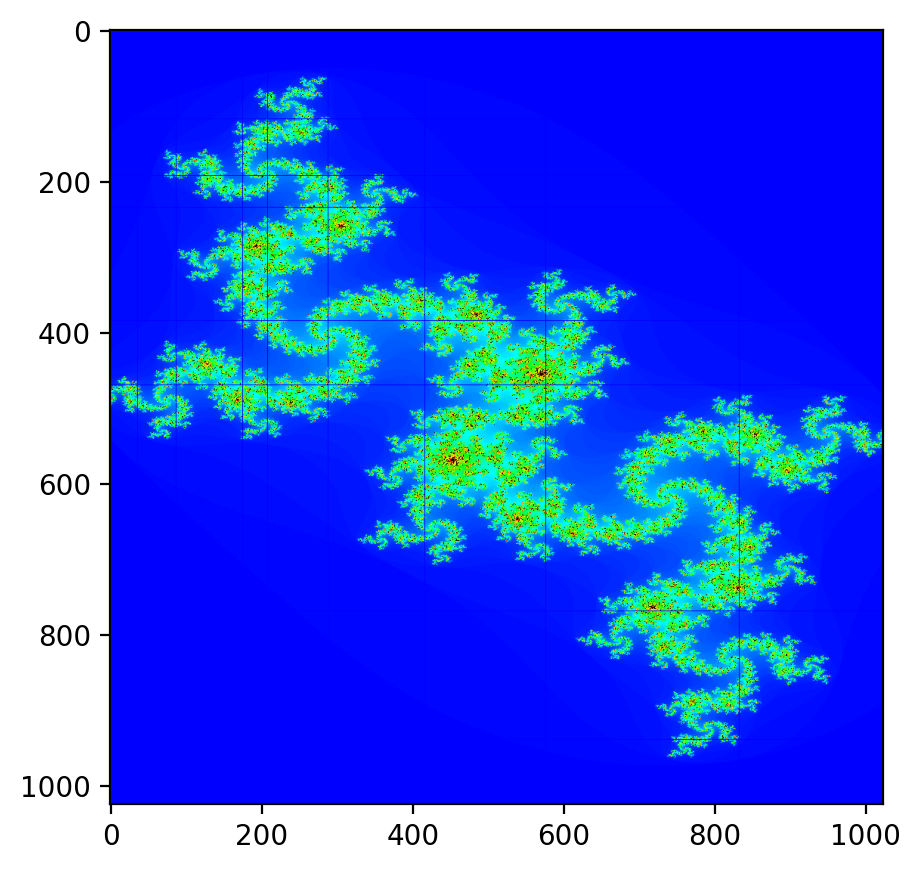

In [6]:
# for pretty rainbow plotting
from colorsys import hls_to_rgb

def rainbow_color_stops(n, end=2/3):
    return [ hls_to_rgb(end * i/(n-1), 0.5, 1) for i in range(n) ]


# check if inputs are in the Julia set
maxiter = 200
colors = rainbow_color_stops(maxiter+1)

my_dpi = 200
plt.figure(figsize=(image_dim/my_dpi, image_dim/my_dpi), dpi=my_dpi)
numcheck = 0

for c in mandel_list_copy[2:142]:
  
    plot_Mat = np.tile(colors[-1], (image_dim, image_dim, 1))
    R = (1 + np.sqrt(1 + 4*np.abs(c)))/2
    numpos = 0
    
    for comp_num in z_all:
        
        niter = 0
        escape_flag = False
        z = comp_num
        
        while niter < maxiter and not escape_flag:
            z = np.power(z,2) + c
            niter += 1
            if np.abs(z) > R:
                escape_flag = True
                
        if not escape_flag:
            plot_Mat[posx[numpos], posy[numpos]] = [0,0,0]
        else:
            plot_Mat[posx[numpos], posy[numpos]] = colors[-niter]
        
        numpos += 1
    
      
        
    numcheck += 1
    plt.imshow(plot_Mat)
    plt.savefig('Figures/' + str(numcheck) + '.png', dpi = my_dpi)
    
    print('Finished computing ' + str(numcheck) + ' out of ' + str(len(mandel_list_copy)) + ' sets.')
    

In [7]:
#save as gif    
import imageio

with imageio.get_writer('julia-set.gif', mode='I', fps=2) as writer:
    for i in range(1,265):
        filename = 'Figures/' + str(i) + '.png'
        image = imageio.imread(filename)
        writer.append_data(image)
        
print("Done writing gif")


Done writing gif


In [5]:
# save the structural similarity index between each pair of images
# for 266 images, this will write 266*266 values

import skimage as ski
nimages = len(mandel_list_copy)-2

with open("julia_image_similarities.txt", "a+") as f:
    
    for i in range(47, nimages+1):
        
        img1 = ski.io.imread('Figures/' + str(i) + '.png')
        img1 = img1[:,:,0]
        for j in range(1,nimages+1):
            img2 = ski.io.imread('Figures/' + str(j) + '.png')
            img2 = img2[:,:,0]
            ssim = ski.metrics.structural_similarity(img1, img2, win_size=101)
            f.write(str(ssim) + '\t')
            
        f.write('\n')
        print('Processed '+ str(i) + ' out of ' + str(nimages) + ' images' )
        
print ("finished calculating structural similarity")



Processed 47 out of 264 images
Processed 48 out of 264 images
Processed 49 out of 264 images
Processed 50 out of 264 images
Processed 51 out of 264 images
Processed 52 out of 264 images
Processed 53 out of 264 images
Processed 54 out of 264 images
Processed 55 out of 264 images
Processed 56 out of 264 images
Processed 57 out of 264 images
Processed 58 out of 264 images
Processed 59 out of 264 images
Processed 60 out of 264 images
Processed 61 out of 264 images
Processed 62 out of 264 images
Processed 63 out of 264 images
Processed 64 out of 264 images
Processed 65 out of 264 images
Processed 66 out of 264 images
Processed 67 out of 264 images
Processed 68 out of 264 images
Processed 69 out of 264 images
Processed 70 out of 264 images
Processed 71 out of 264 images
Processed 72 out of 264 images
Processed 73 out of 264 images
Processed 74 out of 264 images
Processed 75 out of 264 images
Processed 76 out of 264 images
Processed 77 out of 264 images
Processed 78 out of 264 images
Processe